# 2 (NH) Qubits. Entanglement enhancement by EP

In [9]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, multi_dot, inv, matrix_power, eigh, eigvalsh, eigvals
from scipy.optimize import curve_fit
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size']=18
from scipy.linalg import expm, sqrtm, logm
#from scipy.stats import linregress
from math import acos, factorial
import matplotlib.colors as colors
from scipy.special import eval_genlaguerre, gamma, hyp1f1, erf, erfc, erfi, dawsn
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def tildeSRE(rho):
    #l0 = eval2(g, G)
    #numer = (2*(4 - A(g,G)*l0 + l0**2)**4)/(16*l0**4 + (A(g,G) - l0)**4*l0**4 + (4 - A(g,G)*l0 + l0**2)**4)
    #return np.log(numer)/np.log(2)
    rx = np.real(rho[1,0])*2
    ry = np.imag(rho[1,0])*2
    rz = 2*rho[0,0]-1
    return -np.log((1+rx**4+ry**4+rz**4)/(1+rx**2+ry**2+rz**2))/np.log(2)
def ent_entropy(rho):
    return -np.trace(rho@logm(rho))

In [4]:
σx = np.asarray([[0,1],[1,0]])
σy = np.asarray([[0,-1j],[1j,0]])
σz = np.asarray([[1,0],[0,-1]])
Pe = np.asarray([[0,0],[0,1]])
σp = np.asarray([[0,1],[0,0]])
σm = np.asarray([[0,0],[1,0]])
Id = np.asarray([[1,0],[0,1]])

In [5]:
def evol_SR_xy(Δ1, Γ1, Ω1, psi0, t_arr):
    H = (Δ1 - 1j*Γ1/2)*Pe + Ω1*(σx+σy)/np.sqrt(2)
    dt = t_arr[1]-t_arr[0]
    propdt = expm(-1j*H*dt)
    psi_t = np.zeros((2,len(t_arr)), dtype = complex)
    psi_t[:,0] = psi0
    SR_t = np.zeros(len(t_arr))
    SR_t[0] = np.sum(np.abs(psi0)**2)
    for n in range(1,len(t_arr)):
        psi_unnorm = propdt@psi_t[:,n-1]
        psi_t[:,n] = psi_unnorm
        SR_t[n] = np.sum(np.abs(psi_unnorm)**2)
    return SR_t
def evol_SR_x(Δ1, Γ1, Ω1, psi0, t_arr):
    H = (Δ1 - 1j*Γ1/2)*Pe + Ω1*(σx)
    dt = t_arr[1]-t_arr[0]
    propdt = expm(-1j*H*dt)
    psi_t = np.zeros((2,len(t_arr)), dtype = complex)
    psi_t[:,0] = psi0
    SR_t = np.zeros(len(t_arr))
    SR_t[0] = np.sum(np.abs(psi0)**2)
    for n in range(1,len(t_arr)):
        psi_unnorm = propdt@psi_t[:,n-1]
        psi_t[:,n] = psi_unnorm
        SR_t[n] = np.sum(np.abs(psi_unnorm)**2)
    return SR_t

In [6]:
#Qubit 1
Δ1 = 0
Γ1_arr = np.linspace(2, 10, 500) #μs-1
#Ω1 = Γ1/(2*np.sqrt(6)) #μs-1
#Ω1 = Γ1/(2*2*np.sqrt(2)) #μs-1
Ω1 = 1
#Hs1 = (Δ1 - 1j*Γ1/2)*Pe + Ω1*(σx+σy)/np.sqrt(2)
#H = np.kron(Hs1, Id) + np.kron(Id, Hs2) + J*(np.kron(σp, σm)+np.kron(σm, σp))
#Initial state |ff>
psi0 = np.asarray([1/np.sqrt(2), 1/np.sqrt(2)])
#psi0 = np.asarray([(1+1j)/2, (1-1j)/2])
print(np.sum(np.abs(psi0)**2))
#psi0 = np.asarray([1,1,1,1])
#psi0 = np.kron([np.exp(1j*np.pi/4),1]/np.sqrt(2), [1,0])
#psi0 = np.kron([np.cos(np.pi/8),np.sin(np.pi/8)], [1,0])
#psi0 = psi0/np.sqrt(np.sum(np.abs(psi0)**2))
gap = np.sqrt(Γ1_arr**2-4*Ω1**2)

0.9999999999999998


In [7]:
#t_arr = np.linspace(0, 5, 200)
Nt = 300
SRinvgap_xy = np.zeros(len(Γ1_arr))
SRinvgap_x = np.zeros(len(Γ1_arr))
SRinvgap_xy2 = np.zeros(len(Γ1_arr))
SRinvgap_x2 = np.zeros(len(Γ1_arr))
for k in range(len(Γ1_arr)):
    t_arr = np.linspace(0, 1/gap[k], Nt)
    SR_xy = evol_SR_xy(Δ1, Γ1_arr[k], Ω1, psi0, t_arr)
    SRinvgap_xy[k] = SR_xy[-1]
    SR_x = evol_SR_x(Δ1, Γ1_arr[k], Ω1, psi0, t_arr)
    SRinvgap_x[k] = SR_x[-1]
    t_arr2 = np.linspace(0, 2/gap[k], Nt)
    SR_xy2 = evol_SR_xy(Δ1, Γ1_arr[k], Ω1, psi0, t_arr2)
    SRinvgap_xy2[k] = SR_xy2[-1]
    SR_x2 = evol_SR_x(Δ1, Γ1_arr[k], Ω1, psi0, t_arr2)
    SRinvgap_x2[k] = SR_x2[-1]

<ipython-input-7-e7bb1a918a41>:8: RuntimeWarning: divide by zero encountered in double_scalars
  t_arr = np.linspace(0, 1/gap[k], Nt)
/Users/pablo.martinez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
<ipython-input-7-e7bb1a918a41>:13: RuntimeWarning: divide by zero encountered in double_scalars
  t_arr2 = np.linspace(0, 2/gap[k], Nt)


0.39843311802778014
0.6117004409420155
0.150184111227065
0.4491240182099337


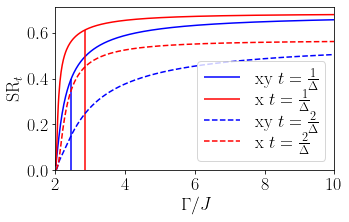

In [10]:
plt.figure(figsize = [5, 3])
#plt.plot(t_arr, SR)
#plt.vlines(1/gap, 0,1)
#plt.yscale('log')
plt.plot(Γ1_arr, SRinvgap_xy, c = 'b')
plt.plot(Γ1_arr, SRinvgap_x, c = 'r')
idx_xy = np.argmin(np.abs(Γ1_arr-np.sqrt(6)))
plt.vlines(Γ1_arr[idx_xy], 0, SRinvgap_xy[idx_xy], color = 'b', label=r"xy $t=\frac{1}{\Delta}$")
print(SRinvgap_xy[idx_xy])
idx_x = np.argmin(np.abs(Γ1_arr-np.sqrt(8)))
plt.vlines(Γ1_arr[idx_x], 0, SRinvgap_x[idx_x], color = 'r', label=r"x $t=\frac{1}{\Delta}$")
print(SRinvgap_x[idx_x])
plt.plot(Γ1_arr, SRinvgap_xy2, c = 'b', linestyle = '--', label=r"xy $t=\frac{2}{\Delta}$")
plt.plot(Γ1_arr, SRinvgap_x2, c= 'r', linestyle = '--', label=r"x $t=\frac{2}{\Delta}$")
#plt.vlines(Γ1_arr[idx_xy], 0, SRinvgap_xy2[idx_xy], color = 'b', linestyle = '--')
print(SRinvgap_xy2[idx_xy])
#plt.vlines(Γ1_arr[idx_x], 0, SRinvgap_x2[idx_x], color = 'r', linestyle = '--')
print(SRinvgap_x2[idx_x])
#plt.vlines(2*np.sqrt(2), 0, SRinvgap_x[np.argmin(np.abs(Γ1_arr-2*np.sqrt(2)))])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r"$\Gamma/J$")
plt.ylabel(r"${\rm SR}_{t}$")
plt.xlim(Γ1_arr[0], Γ1_arr[-1])
plt.ylim(0,)
plt.legend(labelspacing = 0)
#plt.savefig("DQ_SuccesRate.pdf", bbox_inches = 'tight')
plt.show()